In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/priject1/lab6/insurance.csv"
df = pd.read_csv(path)
print('\nNumber of rows and columns in the data set: ',df.shape)


Number of rows and columns in the data set:  (1338, 7)


In [4]:
# desribe the dataset (Exploratory data analysis) 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Check for missing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [7]:
# correlation plot
corr_p = df.corr(method ='pearson') #'pearson’, ‘kendall’, ‘spearman'
corr_p

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


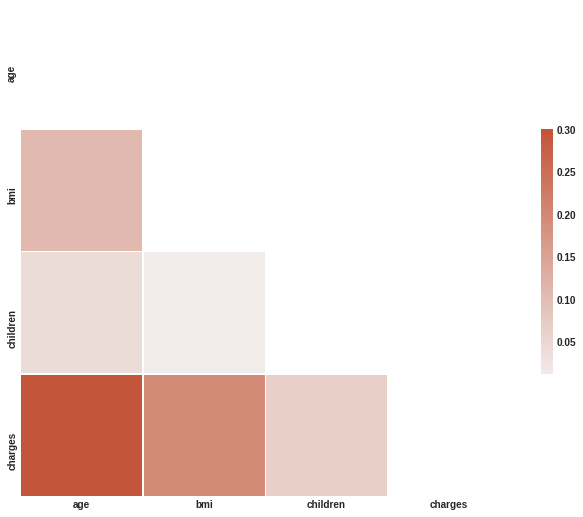

In [8]:
mask = np.triu(np.ones_like(corr_p, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_p, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Distribution of insurance charges')

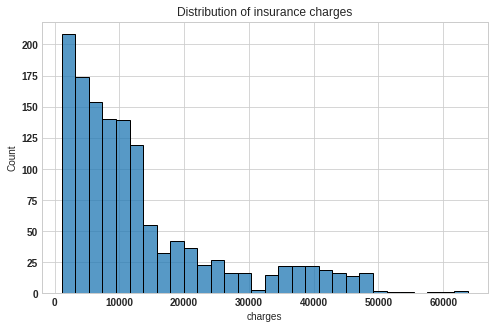

In [9]:
#Plot the distribution of the dependent variable
f= plt.figure(figsize=(8,5))
sns.histplot(df['charges'])
plt.title('Distribution of insurance charges')

Text(0.5, 1.0, 'Distribution of insurance charges in $log$ sacle')

<Figure size 1080x360 with 0 Axes>

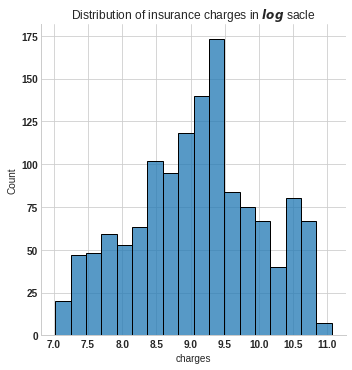

In [10]:
f= plt.figure(figsize=(15,5))
log_resp = np.log(df['charges'])
sns.displot(log_resp)
plt.title('Distribution of insurance charges in $log$ sacle')

#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df["sex"] = df["sex"].astype('category')
df["sex"] = df["sex"].cat.codes
df["smoker"] = df["smoker"].astype('category')
df["smoker"] = df["smoker"].cat.codes
df["region"] = df["region"].astype('category')
df["region"] = df["region"].cat.codes

In [13]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [14]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Model building

In [15]:
# Step 1: add x0 =1 to dataset
X_train.insert(0, 'x0', 1)

In [16]:
# Step2: build model
x0 = X_train['x0'].values
age = X_train['age'].values
sex = X_train['sex'].values
bmi = X_train['bmi'].values
children = X_train['children'].values
smoker = X_train['smoker'].values
region = X_train['region'].values
charges = y_train.values


# a = len(age)
# x0 = np.ones(a)
X_lr = np.array([x0, age, sex, bmi, children, smoker, region]).T
B = np.array([0, 0, 0, 0, 0, 0, 0])
Y_lr = np.array(charges)
alpha = 0.0001

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
    return B, cost_history

newB, cost_history = gradient_descent(X_lr, Y_lr, B, alpha, 2000000)

# The parameters for linear regression model
print(newB)

[-11274.40400039    265.04685197    -99.30813341    311.7515371
    482.02087123  23540.99012536   -442.52816918]


In [17]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#Parameter
print(model.coef_)

[    0.           265.19883686   -97.33773376   312.49157945
   482.60579911 23542.23134407  -441.91221621]


In [18]:
data = {'Built_model':newB,
        'SKlearn_model':model.coef_}
df1 = pd.DataFrame(data)
df1

,Built_model,SKlearn_model
0,-11274.404000,0.000000
1,265.046852,265.198837
2,-99.308133,-97.337734
3,311.751537,312.491579
4,482.020871,482.605799
5,23540.990125,23542.231344
6,-442.528169,-441.912216


#Model evaluation

In [19]:
X_test.insert(0, 'x0', 1)

In [20]:
# prediction
x01 = X_test['x0'].values
age1 = X_test['age'].values
sex1 = X_test['sex'].values
bmi1 = X_test['bmi'].values
children1 = X_test['children'].values
smoker1 = X_test['smoker'].values
region1 = X_test['region'].values
charges1 = y_test.values

X_lr1 = np.array([x01, age1, sex1, bmi1, children1, smoker1, region1]).T
y_lr1 = np.array(charges1)

y_pred = X_lr1.dot(newB) 

#Evaluvation: MSE (Write your MSE equation from scratch)

def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

J_mse = rmse(y_lr1, y_pred)

In [21]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  5961.015504073384


In [22]:
# sklearn regression module
y_pred_sk = model.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = np.sqrt(mean_squared_error(y_test, y_pred_sk))

In [23]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  5960.724927961925


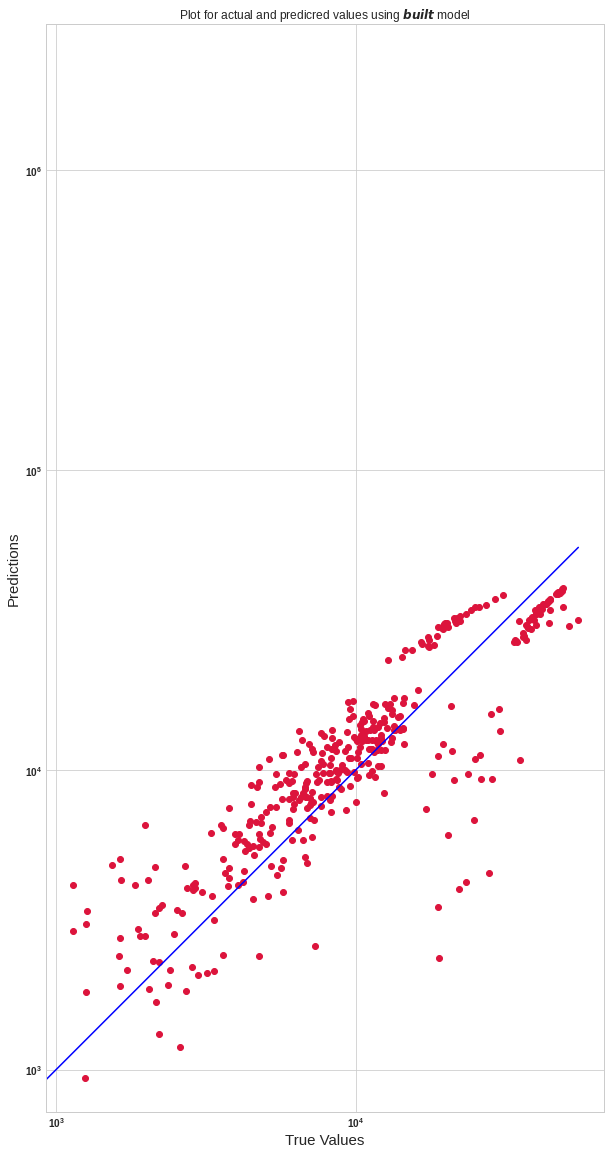

In [24]:
# Check for Linearity
plt.figure(figsize=(10,20))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Plot for actual and predicred values using $built$ model')
plt.show()

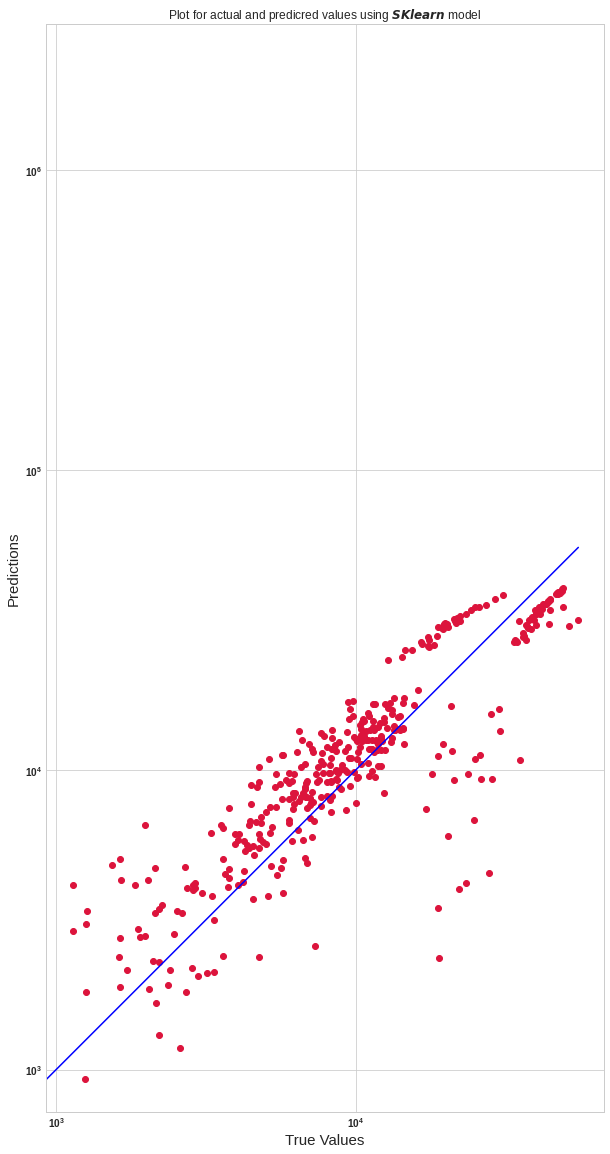

In [25]:
plt.figure(figsize=(10,20))
plt.scatter(y_test, y_pred_sk, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_sk), max(y_test))
p2 = min(min(y_pred_sk), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Plot for actual and predicred values using $SKlearn$ model')
plt.show()